### In-Class Assignment: Web Scraping and Data Extraction from a New Webpage
Use the requests library to fetch a new webpage.
Parse the HTML content using BeautifulSoup.
Extract various elements such as figures, tables, and text.
Work collaboratively in groups to practice web scraping and present their findings.
- Task 1: Select a Webpage of interest (e.g., a news article, an educational resource, or a data-driven website). Ensure that the selected webpage contains a variety of elements, such as tables, figures, and text content.
- Task 2: Fetch and Parse the Webpage

In [1]:
import requests
from bs4 import BeautifulSoup

url = 'https://en.wikipedia.org/wiki/2024_Summer_Olympics_medal_table'
response = requests.get(url)

In [2]:

# Check if the request was successful
if response.status_code == 200:
    print("Successfully fetched the webpage!")
else:
    print("Failed to fetch the webpage.")

Successfully fetched the webpage!


In [3]:

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

### Task 3: Extract Elements

In [5]:
# Locate and extract all tables on the webpage, converting them into Pandas DataFrames.
import pandas as pd

tables = soup.find_all('table')
for i, table in enumerate(tables):
    df = pd.read_html(str(table))[0]
    print(f"Table {i+1}:\n", df.head(), "\n")

Table 1:
                          2024 Summer Olympics medals  \
0  Léon Marchand (pictured) won four gold medals ...   
1                                           Location   
2                                         Highlights   
3                                   Most gold medals   
4                                  Most total medals   

                       2024 Summer Olympics medals.1 Unnamed: 2  
0  Léon Marchand (pictured) won four gold medals ...        NaN  
1                                      Paris, France        NaN  
2                                         Highlights        NaN  
3                  United States (40) and China (40)        NaN  
4                                United States (126)        NaN   

Table 2:
           0                      1         2
0  ← 2020 ·  Olympics medal tables  · 2028 → 

Table 3:
                                                    0
0                                Part of a series on
1                               2024 

In [6]:
tables = soup.find_all('table')
table_4=tables[3]
table_4

<table class="wikitable sortable sticky-header-multi plainrowheaders jquery-tablesorter" style="text-align:center"><caption>2024 Summer Olympics medal table<sup class="reference" id="cite_ref-IOC_2024_Medal_Table_19-1"><a href="#cite_note-IOC_2024_Medal_Table-19"><span class="cite-bracket">[</span>19<span class="cite-bracket">]</span></a></sup><sup class="reference" id="cite_ref-ANI_medal_table_inclusion_39-0"><a href="#cite_note-ANI_medal_table_inclusion-39"><span class="cite-bracket">[</span>B<span class="cite-bracket">]</span></a></sup><sup class="reference" id="cite_ref-40"><a href="#cite_note-40"><span class="cite-bracket">[</span>C<span class="cite-bracket">]</span></a></sup></caption><tbody><tr><th scope="col" style="color:inherit">Rank</th><th scope="col"><abbr title="National Olympic Committee">NOC</abbr></th><th class="headerSort" scope="col" style="width:4em;background-color:gold;color:#333">Gold</th><th class="headerSort" scope="col" style="width:4em;background-color:silver

In [7]:
type(table)

bs4.element.Tag

In [8]:
df=pd.read_html(str(tables[3]))[0]
df.head()

,Rank,NOC,Gold,Silver,Bronze,Total
0,1,United States‡,40,44,42,126
1,2,China,40,27,24,91
2,3,Japan,20,12,13,45
3,4,Australia,18,19,16,53
4,5,France*,16,26,22,64


In [11]:
'https://en.wikipedia.org'

'https://en.wikipedia.org'

In [13]:
urljoin(base_url, first_image_url)

NameError: name 'urljoin' is not defined

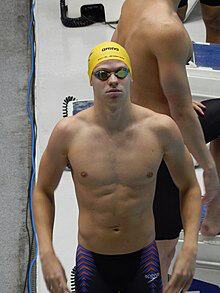

In [18]:
from urllib.parse import urljoin
from PIL import Image
from io import BytesIO
images = soup.find_all('img')
image_urls= [img['src'] for img in images if 'src' in img.attrs]
if image_urls:
    first_image_url = image_urls[3]
    base_url = 'https://en.wikipedia.org'
    first_image_url = urljoin(base_url, first_image_url)
    response = requests.get(first_image_url)
    img = Image.open(BytesIO(response.content))
    display(img)
else:
    print("No images found.")

In [21]:
#Extract the main text content, such as paragraphs or headings.
paragraphs = soup.find_all('p')
text_content = ' '.join([para.get_text() for para in paragraphs])
print(text_content[:500])  # Print the first 500 characters


 The 2024 Summer Olympics, officially known as the Games of the XXXIII Olympiad, were an international multi-sport event held in Paris, France from 26 July to 11 August 2024, with preliminary events in some sports beginning on 24 July.[1] Athletes representing 206 National Olympic Committees (NOCs) participated in the games.[2] The games featured 329 events across 32 sports and 48 disciplines.[3] Breaking (breakdancing) made its Olympic debut as an optional sport, while skateboarding, sport cli


### Task 4: Analyze and Discuss Findings
Each group will analyze the extracted data and discuss the following:
- What figures (images) were extracted and what do they represent?
- What information is contained in the tables, and how does it contribute to the overall content of the webpage?
- What is the main focus of the text content extracted? How does it relate to the images and tables?
- Discuss the challenges faced during extraction, such as dealing with complex HTML structures or incomplete data.

The image that was extracted is a picture of Léon Marchand who won four gold medals at the 2024 Summer Olympics, the most of any competing athlete. The table contains the medal count for the top five performing countries at the most recent summer olympics displayed by total Gold, Silver, Bronze, and total medals. The text extracted focuses on the number of National Olympic Committes, the number of events at this olympics. Challenges that were faced during this data extraction were needing to import functions so the image could be properly displayed.

### Task 5: Present Findings
Shares your analysis of the extracted elements.
Discusses any patterns, relationships, or insights gained from the data.

Each group should submit their Jupyter notebook (or Python script) with the code, analysis, and any additional notes or reflections on the exercise.